In [ ]:
!pip install plotly

     -------------------------------------- 15.2/15.2 MB 505.2 kB/s eta 0:00:00


In [ ]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 575.2 kB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.3 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=2b6f588b711fdc3afcb2cfafb1b38202d130271723f8d466fad7b68725407f51
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [ ]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
!pip uninstall gensim

In [ ]:
!pip install gensim==3.8.3

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import regex
import string
import re

In [ ]:
##Importing the dataset
df = pd.read_json("Clean_Database.json")
df.head()

,Title_1,Title_2,Title_3,Title_4,Corpus
0,Project scope management,,,,Project Scope Management includes the processe...
1,Project scope management,Plan scope management,,,Plan Scope Management is the process of creati...
2,Project scope management,Plan scope management,Inputs,Project charter,Described in Section The project charter docum...
3,Project scope management,Plan scope management,Inputs,Project management plan,Described in Section Project management plan c...
4,Project scope management,Plan scope management,Inputs,Enterprise environmental factors,The enterprise environmental factors that can ...


In [ ]:
df["Title_1"] = df["Title_1"].astype(str)
df["Title_2"] = df["Title_2"].astype(str)
df["Title_3"] = df["Title_3"].astype(str)
df["Title_4"] = df["Title_4"].astype(str)
df["Corpus"] = df["Corpus"].astype(str)

In [ ]:
df.shape

(216, 5)

In [ ]:
df["Title_1"].unique()

array(['Project scope management', 'Project schedule management',
       'Project cost management'], dtype=object)

In [ ]:
df.iloc[1,4]

'Plan Scope Management is the process of creating a scope management plan that documents how the project and product scope will be deﬁned validated and controlled The key beneﬁt of this process is that it provides guidance and direction on how scope will be managed throughout the project This process is performed once or at predeﬁned points in the project The inputs tools and techniques and outputs of this process are depicted in Figure Figure depicts the data ﬂow diagram of the process Plan Scope Management Inputs Tools Techniques Outputs Project charter Expert judgment Scope management plan Project management plan Data analysis Requirements management Quality management plan Alternatives analysis plan Project life cycle description Meetings Development approach Enterprise environmental factors Organizational process assets Figure Plan Scope Management Inputs Tools Techniques and Outputs Develop Project Charter Project charter Project Project Management Plan Scope Management Plan Mana

<ul>
    <li>PMBOK® --> pmbok guide</li>
    <li>Remove <b>":"</b></li>
    <li>Change <b>";"</b> --> <b>","</b></li>
</ul>

In [ ]:
def cleaning_corpus(text):
    text = regex.sub(r"PMBOK®", "pmbok guide", text)
    text = regex.sub(r"[\d.]","",text)
    text = regex.sub(r"["+string.punctuation+"]", " ", text)
    text = regex.sub(r"•", "", text)
    text = regex.sub(r"–", " ", text)
    text = regex.sub(r"\n", "", text)
    text = regex.sub(r"\s{2,}", " ", text)
    text = regex.sub(r"^\s","",text)
    return text
clean_corpus = lambda x:cleaning_corpus(x)

def cleaning_titles(text):
    text = text.capitalize()
    text = regex.sub(r"^\s","",text)
    text = regex.sub(r"\s$","",text)
    return text
clean_titles = lambda x:cleaning_titles(x)

In [ ]:
df["Corpus"] = df["Corpus"].apply(clean_corpus)
df["Title_1"] = df["Title_1"].apply(clean_titles)
df["Title_2"] = df["Title_2"].apply(clean_titles)
df["Title_3"] = df["Title_3"].apply(clean_titles)
df["Title_4"] = df["Title_4"].apply(clean_titles)

In [ ]:
df["Corpus"][209]

'The to complete performance index TCPI is a measure of the cost performance that is required to be achieved with the remaining resources in order to meet a speciﬁed management goal expressed as the ratio of the cost to ﬁnish the outstanding work to the remaining budget TCPI is the calculated cost performance index that is achieved on the remaining work to meet a speciﬁed management goal such as the BAC or the EAC If it becomes obvious that the BAC is no longer viable the project manager should consider the forecasted EAC Once approved the EAC may replace the BAC in the TCPI calculation The equation for the TCPI based on the BAC BAC EV BAC AC The TCPI is conceptually displayed in Figure The equation for the TCPI is shown in the lower left as the work remaining deﬁned as the BAC minus the EV divided by the funds remaining which can be either the BAC minus the AC or the EAC minus the AC If the cumulative CPI falls below the baseline as shown in Figure all future work of the project will 

In [ ]:
df["Title_1"]

0      Project scope management
1      Project scope management
2      Project scope management
3      Project scope management
4      Project scope management
                 ...           
211     Project cost management
212     Project cost management
213     Project cost management
214     Project cost management
215     Project cost management
Name: Title_1, Length: 216, dtype: object

In [ ]:
"text text".capitalize()

'Text text'

In [ ]:
df.head()

,Title_1,Title_2,Title_3,Title_4,Corpus
0,Project scope management,,,,Project Scope Management includes the processe...
1,Project scope management,Plan scope management,,,Plan Scope Management is the process of creati...
2,Project scope management,Plan scope management,Inputs,Project charter,Described in Section The project charter docum...
3,Project scope management,Plan scope management,Inputs,Project management plan,Described in Section Project management plan c...
4,Project scope management,Plan scope management,Inputs,Enterprise environmental factors,The enterprise environmental factors that can ...


In [ ]:
# df.to_json("Data/Clean_Database.json")

In [ ]:
df.Corpus[0]

'Project Scope Management includes the processes required to ensure that the project includes all the work required and only the work required to complete the project successfully Managing the project scope is primarily concerned with deﬁning and controlling what is and is not included in the project The Project Scope Management processes are Plan Scope Management—The process of creating a scope management plan that documents how the project and product scope will be deﬁned validated and controlled Collect Requirements—The process of determining documenting and managing stakeholder needs and requirements to meet project objectives Define Scope—The process of developing a detailed description of the project and product Create WBS—The process of subdividing project deliverables and project work into smaller more manageable components Validate Scope—The process of formalizing acceptance of the completed project deliverables Control Scope—The process of monitoring the status of the project

In [ ]:
dataFrame = pd.DataFrame(columns=['topic', 'corpus'])

In [ ]:
for i, row in df.iterrows():
    # dataFrame.loc[i] = [row['Title_1'] + ' ' + row['Title_2'] + ' ' + row['Title_3'] + ' ' + row['Title_4']] + [row['Corpus']]
    dataFrame.loc[i] = [row['Title_1']] + [row['Corpus']]    

In [ ]:
dataFrame

,topic,corpus
0,Project scope management,Project Scope Management includes the processe...
1,Project scope management,Plan Scope Management is the process of creati...
2,Project scope management,Described in Section The project charter docum...
3,Project scope management,Described in Section Project management plan c...
4,Project scope management,The enterprise environmental factors that can ...
...,...,...
211,Project cost management,Described in Section Work performance informat...
212,Project cost management,Either a calculated EAC value or a bottom up E...
213,Project cost management,Described in Section Analysis of project perfo...
214,Project cost management,Any change to the project management plan goes...


In [ ]:
corpus_and_topic = [(row['topic'],row['corpus']) for i, row in dataFrame.iterrows()]

# Visualization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook

In [ ]:
stopword_list = stopwords.words('english')
dtm = CountVectorizer(max_df=0.7, min_df=5, token_pattern="[a-z']+", 
                      stop_words=stopword_list, max_features=2000) # Only top 2000 most frequently ocurring words are considered
dtm.fit(dataFrame['corpus'])
dtm_mat = dtm.transform(dataFrame['corpus'])

In [ ]:
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(dtm_mat)
tsvd_mat = tsvd.transform(dtm_mat)
s_list = []

In [ ]:
for clus in tqdm(range(2,21)):

    km = KMeans(n_clusters=clus, n_init=50, max_iter=1000) # Instantiate KMeans clustering

    km.fit(tsvd_mat) # Run KMeans clustering

    s = silhouette_score(tsvd_mat, km.labels_)

    s_list.append(s)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:03<00:00,  4.78it/s]


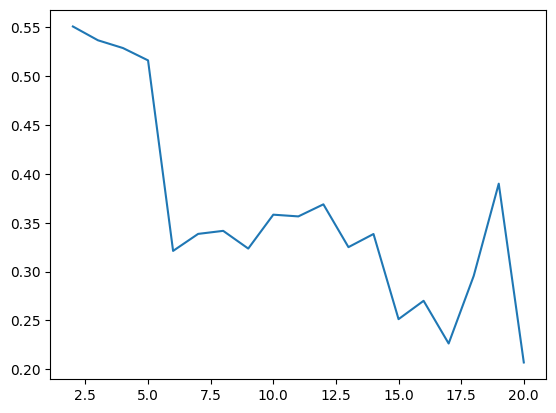

In [ ]:
plt.plot(range(2,21), s_list)

plt.show()

In [ ]:
tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)

C:\Users\lenovo\anaconda3\envs\py39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lenovo\anaconda3\envs\py39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\lenovo\anaconda3\envs\py39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

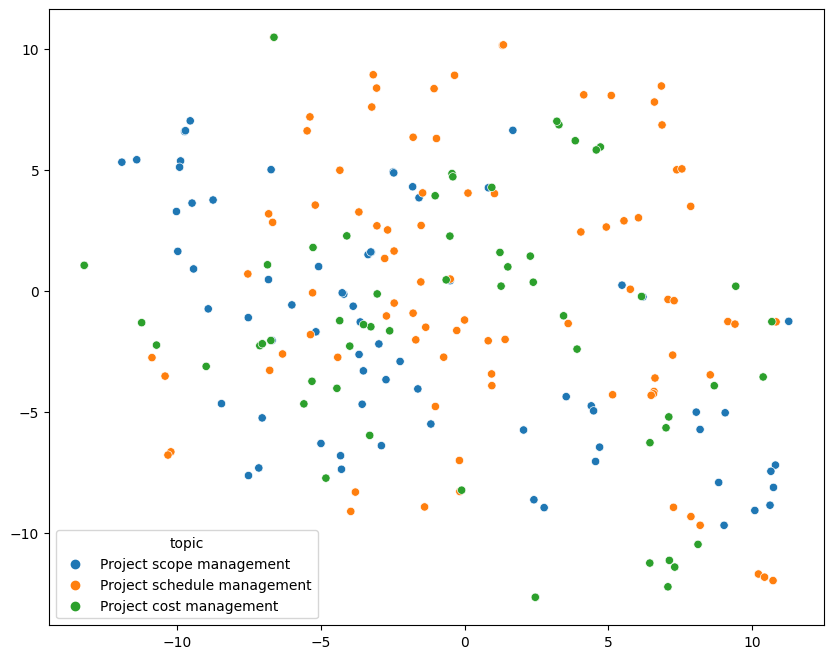

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(tsne_mat[:,0],tsne_mat[:,1],hue=dataFrame['topic'])

In [ ]:
from sklearn.metrics import pairwise_distances
import numpy as np
query = "Any change to the project "
query_mat = tsvd.transform(dtm.transform([query]))
dist = pairwise_distances(X=tsvd_mat, Y=query_mat, metric='cosine')
print(dataFrame['topic'][np.argmin(dist.flatten())])
dataFrame['corpus'][np.argmin(dist.flatten())]

Project schedule management


'Described in Section Once the project has been baselined the progressive elaboration of deliverables into activities may reveal work that was not initially part of the project baselines This may result in a change request Change requests are processed for review and disposition through the Perform Integrated Change Control process Section '

# Synonym

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
allText = ''
for i, row in dataFrame.iterrows():
    allText = allText + row['corpus'] + '. ' 

In [ ]:
def tokenizer(sentence):
    return nltk.word_tokenize(str(sentence))

In [ ]:
def removeStopWords(row):
    tokenizedRow = tokenizer(row)
    return ' '.join([item for item in tokenizedRow if item not in stop_words])
    

In [ ]:
text_without_stopwords = removeStopWords(allText)

In [ ]:
tokenized_text = tokenizer(text_without_stopwords.lower())

In [ ]:
tokenized_text

['project',
 'scope',
 'management',
 'includes',
 'processes',
 'required',
 'ensure',
 'project',
 'includes',
 'work',
 'required',
 'work',
 'required',
 'complete',
 'project',
 'successfully',
 'managing',
 'project',
 'scope',
 'primarily',
 'concerned',
 'deﬁning',
 'controlling',
 'included',
 'project',
 'the',
 'project',
 'scope',
 'management',
 'processes',
 'plan',
 'scope',
 'management—the',
 'process',
 'creating',
 'scope',
 'management',
 'plan',
 'documents',
 'project',
 'product',
 'scope',
 'deﬁned',
 'validated',
 'controlled',
 'collect',
 'requirements—the',
 'process',
 'determining',
 'documenting',
 'managing',
 'stakeholder',
 'needs',
 'requirements',
 'meet',
 'project',
 'objectives',
 'define',
 'scope—the',
 'process',
 'developing',
 'detailed',
 'description',
 'project',
 'product',
 'create',
 'wbs—the',
 'process',
 'subdividing',
 'project',
 'deliverables',
 'project',
 'work',
 'smaller',
 'manageable',
 'components',
 'validate',
 'scope—the

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec([tokenized_text], size=100, window=5, min_count=1, workers=4)

In [ ]:
vocabulary = model.wv.vocab

In [ ]:
sim_words = model.wv.most_similar('scope')

In [ ]:
sim_words

[('project', 0.9998849630355835),
 ('schedule', 0.9998714923858643),
 ('activities', 0.9998531341552734),
 ('duration', 0.9998512268066406),
 ('activity', 0.9998482465744019),
 ('requirements', 0.9998306035995483),
 ('wbs', 0.9998255968093872),
 ('used', 0.9998236894607544),
 ('team', 0.9998202323913574),
 ('level', 0.9998186826705933)]